In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [2]:
# Query to retrieve Washington defensive stats along with weather, altitude, and distance
query = """
SELECT date, location, opponent, 
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, opponent_passing_td, 
       opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, opponent_total_first_downs, 
       opponent_total_penalties, opponent_total_penalties_yds, opponent_total_fum, opponent_total_int, opponent_total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Defensive_Stats;
"""

uw_data = pd.read_sql(query, conn)

# Display the first few rows of the data
uw_data.head()

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_59889/2050919531.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  uw_data = pd.read_sql(query, conn)


,date,location,opponent,opponent_passing_cmp,opponent_passing_att,opponent_completion_pct,opponent_passing_yds,opponent_passing_td,opponent_rushing_att,opponent_rushing_yds,...,opponent_total_penalties,opponent_total_penalties_yds,opponent_total_fum,opponent_total_int,opponent_total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2023-09-02,H,Boise State,22,47,46.8,264,1,28,138,...,3,29,0,2,2,65.7,0.0,5.8,53.0,0.00
1,2023-09-09,H,Tulsa,18,32,56.3,150,1,40,168,...,7,65,0,1,1,67.7,0.0,10.2,53.0,0.00
2,2023-09-16,@,Michigan State,14,35,40.0,208,0,27,53,...,11,83,0,1,1,61.4,0.0,8.9,262.0,1859.35
3,2023-09-23,H,California,27,46,58.7,363,3,35,139,...,2,10,0,3,3,56.3,0.0,17.1,53.0,0.00
4,2023-09-30,@,Arizona,27,39,69.2,232,3,31,110,...,8,60,0,1,1,82.5,0.0,22.7,728.0,1219.94


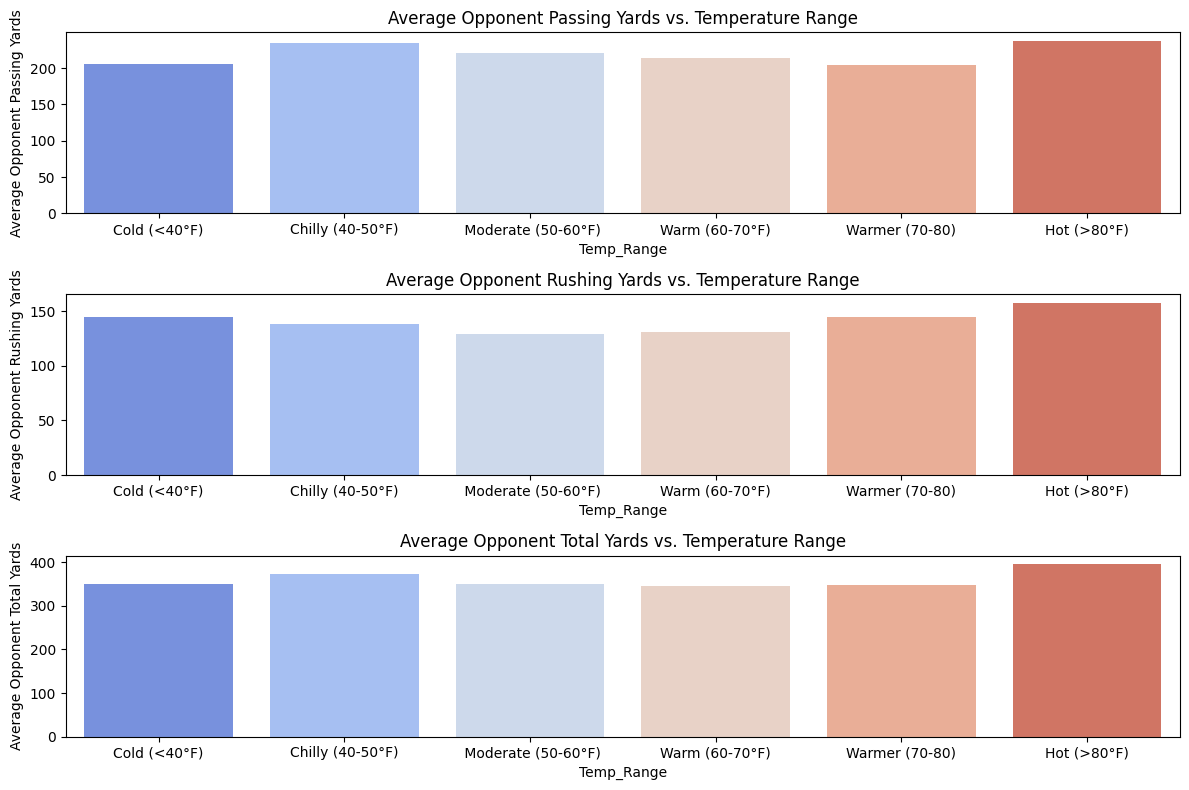

In [3]:
# Create temperature bins
temp_bins = [0, 40, 50, 60, 70, 80, 120]  # Adjust these ranges as needed
temp_labels = ['Cold (<40°F)', 'Chilly (40-50°F)', ' Moderate (50-60°F)', 'Warm (60-70°F)', 'Warmer (70-80)', 'Hot (>80°F)']
uw_data['Temp_Range'] = pd.cut(uw_data['temp_f'], bins=temp_bins, labels=temp_labels, right=False)

# Group by temperature range and calculate mean performance metrics
temp_grouped = uw_data.groupby('Temp_Range', observed=True).agg({
    'opponent_passing_yds': 'mean',
    'opponent_rushing_yds': 'mean',
    'opponent_total_yards': 'mean'
}).reset_index()

# Plotting the data with color palette
plt.figure(figsize=(12, 8))

# Passing Yards
plt.subplot(3, 1, 1)
sns.barplot(x='Temp_Range', y='opponent_passing_yds', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Opponent Passing Yards vs. Temperature Range')
plt.ylabel('Average Opponent Passing Yards')

# Rushing Yards
plt.subplot(3, 1, 2)
sns.barplot(x='Temp_Range', y='opponent_rushing_yds', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Opponent Rushing Yards vs. Temperature Range')
plt.ylabel('Average Opponent Rushing Yards')

# Total Yards
plt.subplot(3, 1, 3)
sns.barplot(x='Temp_Range', y='opponent_total_yards', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Opponent Total Yards vs. Temperature Range')
plt.ylabel('Average Opponent Total Yards')

plt.tight_layout()
plt.show()


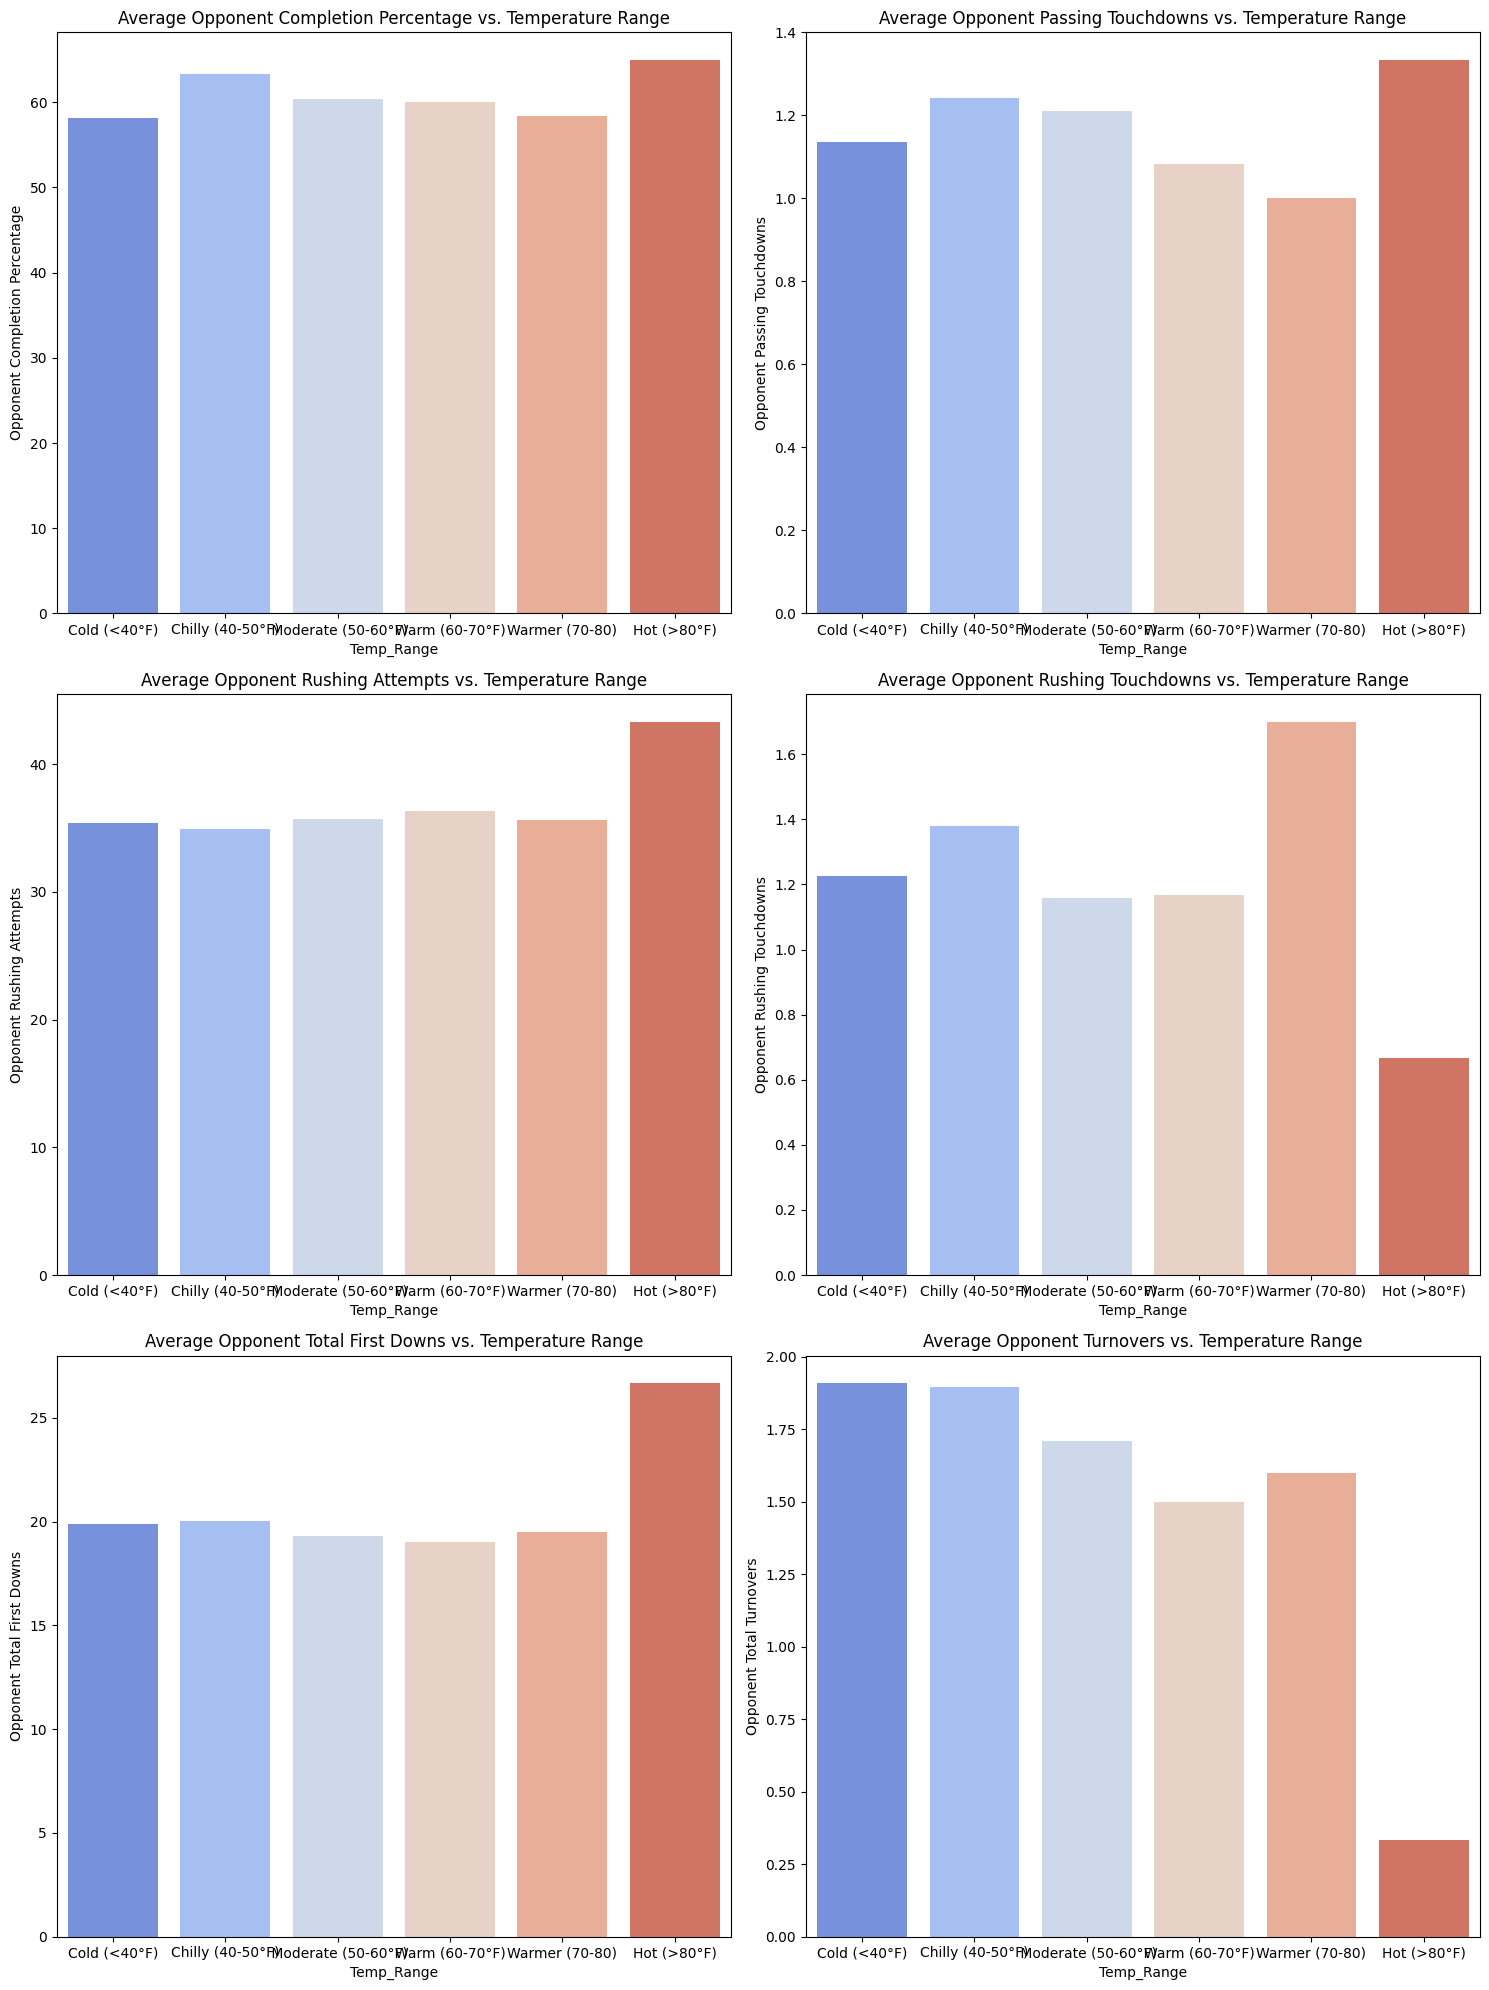

In [4]:
# Group by temperature range and calculate mean performance metrics
temp_grouped = uw_data.groupby('Temp_Range', observed=True).agg({
    'opponent_completion_pct': 'mean',
    'opponent_passing_td': 'mean',
    'opponent_rushing_att': 'mean',
    'opponent_rushing_td': 'mean',
    'opponent_total_first_downs': 'mean',
    'opponent_total_to': 'mean'  # total_to includes both fumbles and interceptions
}).reset_index()

# Plotting the data
plt.figure(figsize=(15, 20))

# Completion Percentage
plt.subplot(3, 2, 1)
sns.barplot(x='Temp_Range', y='opponent_completion_pct', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Opponent Completion Percentage vs. Temperature Range')
plt.ylabel('Opponent Completion Percentage')
plt.legend([],[], frameon=False)

# Passing Touchdowns
plt.subplot(3, 2, 2)
sns.barplot(x='Temp_Range', y='opponent_passing_td', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Opponent Passing Touchdowns vs. Temperature Range')
plt.ylabel('Opponent Passing Touchdowns')
plt.legend([],[], frameon=False)

# Rushing Attempts
plt.subplot(3, 2, 3)
sns.barplot(x='Temp_Range', y='opponent_rushing_att', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Opponent Rushing Attempts vs. Temperature Range')
plt.ylabel('Opponent Rushing Attempts')
plt.legend([],[], frameon=False)

# Rushing Touchdowns
plt.subplot(3, 2, 4)
sns.barplot(x='Temp_Range', y='opponent_rushing_td', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Opponent Rushing Touchdowns vs. Temperature Range')
plt.ylabel('Opponent Rushing Touchdowns')
plt.legend([],[], frameon=False)

# Total First Downs
plt.subplot(3, 2, 5)
sns.barplot(x='Temp_Range', y='opponent_total_first_downs', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Opponent Total First Downs vs. Temperature Range')
plt.ylabel('Opponent Total First Downs')
plt.legend([],[], frameon=False)

# Total Turnovers
plt.subplot(3, 2, 6)
sns.barplot(x='Temp_Range', y='opponent_total_to', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Opponent Turnovers vs. Temperature Range')
plt.ylabel('Opponent Total Turnovers')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

